# Telco Project Part I

## Goals:

>- To identify the factors that contribute to customer churn in the Telco dataset.
>- To develop strategies for retaining customers who are at high risk of churning, based on their tenure and other characteristics.
>- To determine whether there are specific payment methods that are associated with higher rates of churn and to develop recommendations for improving retention for customers who use those payment methods.
>- To investigate whether there is a relationship between the number of services a customer has and their likelihood of churning, and to develop strategies for retaining customers who are at high risk of churning based on their service usage.

## Imports

In [1]:
# Standard imports
import pandas as pd
import numpy as np

# Graph imports
import matplotlib.pyplot as plt
import seaborn as sns
import os

# SKLearn imports
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#import this for the decision tree!
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.tree import plot_tree

# Import to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Stats import
import scipy.stats as stats
# import re

# My imports
import wrangle as w
import prepare as p
import acquire as a
import model as m
import explore as e

### Acquire

>- Got the data from a telco company's database in MySQL.
>- The dataset has information on 7,043 customers and 24 different features, including personal information and details about the services they're using.
>- The data types include floats, integers, and objects.
>- Each row in the dataset represents a single customer.
>- Each column in the dataset represents a specific feature of the customer or their services.

In [2]:
# Get your telco data
telco_df = a.get_telco_data()

csv file found and loaded


In [3]:
# acquire the data dictionary
data_dictionary = w.data_dictionary(telco_df)

features,definition
payment_type_id,Payment type ID
internet_service_type_id,Internet service type ID
contract_type_id,Contract type ID
customer_id,Customer ID
gender,Whether the customer is a male or a female
senior_citizen,Whether the customer is a senior citizen or not
partner,Whether the customer has a partner or not
dependents,Whether the customer has dependents or not
tenure,Number of months the customer has stayed with the company
phone_service,Whether the customer has a phone service or not


### Prepare

Prepare actions:

>- Prepared the data by applying a series of transformations using a custom functions defined in the prepare file. The function removed unnecessary columns, added new columns as needed, and renamed some of the columns for clarity.

>- Also performed some data cleaning steps to ensure the quality of the dataset. Specifically, checked for missing values and duplicates, but found none.

>- To make the dataset more consistent, I standardized the column names by replacing spaces with underscores and converting all text to lowercase.

In [4]:
# Clean the new dataset using the new function called prep_telco
telco_df = p.prep_telco(telco_df)

# Split your data into train, validate and test
train, validate, test = p.split_function(telco_df, 'churn')

### Take a look at the data

In [5]:
# Looking at the information inside the data. 
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            7043 non-null   object 
 1   senior_citizen                         7043 non-null   int64  
 2   tenure                                 7043 non-null   int64  
 3   monthly_charges                        7043 non-null   float64
 4   total_charges                          7043 non-null   float64
 5   payment_type                           7043 non-null   object 
 6   gender_male                            7043 non-null   uint8  
 7   partner_yes                            7043 non-null   uint8  
 8   dependents_yes                         7043 non-null   uint8  
 9   phone_service_yes                      7043 non-null   uint8  
 10  multiple_lines_no_phone_service        7043 non-null   uint8  
 11  mult

In [6]:
# Pull only the five first rows of the data
train.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,payment_type,gender_male,partner_yes,dependents_yes,phone_service_yes,...,streaming_movies_yes,paperless_billing_yes,churn,contract_type_one_year,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card_(automatic),payment_type_electronic_check,payment_type_mailed_check
5310,7503-MIOGA,1,72,89.85,6697.35,Bank transfer (automatic),0,1,0,1,...,1,1,0,0,1,0,0,0,0,0
3790,5329-KRDTM,1,72,77.35,5396.25,Credit card (automatic),1,1,0,1,...,0,0,0,0,1,0,0,1,0,0
4398,6199-IWKGC,1,46,100.25,4753.85,Electronic check,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0
2635,3748-FVMZZ,0,4,40.05,162.45,Electronic check,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
2986,4280-DLSHD,0,8,54.75,445.85,Mailed check,1,1,0,1,...,0,1,0,0,0,0,0,0,0,1


### Description of the Data

In [7]:
# Describe the train data
train.describe()

,senior_citizen,tenure,monthly_charges,total_charges,gender_male,partner_yes,dependents_yes,phone_service_yes,multiple_lines_no_phone_service,multiple_lines_yes,...,streaming_movies_yes,paperless_billing_yes,churn,contract_type_one_year,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card_(automatic),payment_type_electronic_check,payment_type_mailed_check
count,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,...,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000
mean,0.162820,32.473244,65.328937,2310.297451,0.509003,0.486685,0.307634,0.907431,0.092569,0.430383,...,0.396906,0.594725,0.265280,0.215318,0.234339,0.442556,0.215318,0.219376,0.336799,0.222419
std,0.369248,24.551176,30.261023,2282.121687,0.499982,0.499886,0.461573,0.289864,0.289864,0.495193,...,0.489318,0.491007,0.441538,0.411095,0.423639,0.496752,0.411095,0.413876,0.472676,0.415924
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.900000,413.125000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.550000,1404.650000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,90.250000,3910.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8672.450000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Explore

#### 1. What is the distribution of customer churn in the dataset?

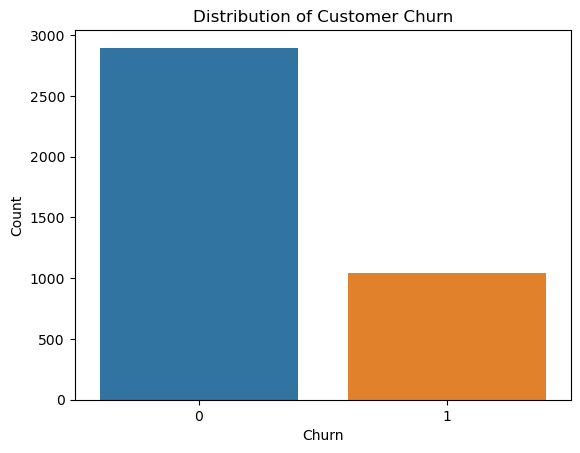

In [8]:
e.get_q_one(train)

         $H_{0}$ : There is not an even distribution between customers that churn compare to the ones that don't.

         $H_{a}$ : There is an even distribution between customers that churn compare to the ones that don't.

>- The distribution of customer churn in the dataset is imbalanced, with significantly more customers not churning compared to those who churn.

#### 2. How does tenure relate to customer churn?

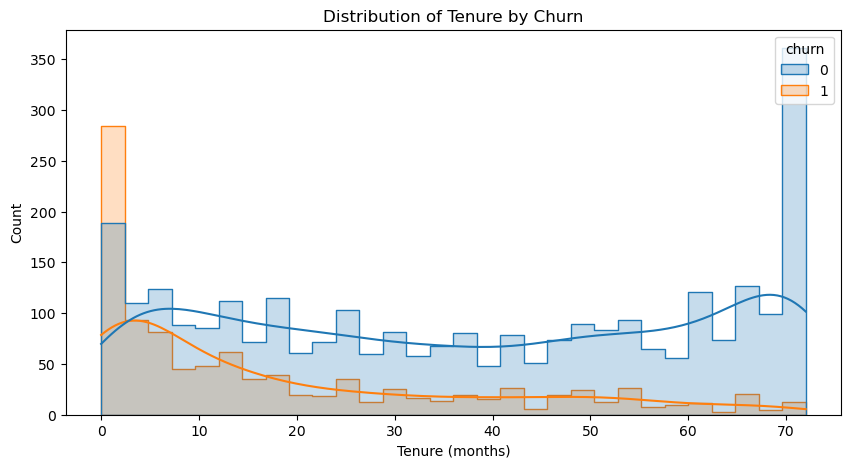

In [9]:
# This histogram shows the relationship between the tenure and customer churn. 
e.get_q_two(train)

         $H_{0}$ : There is not a relationship between customers that churn compare to the ones that don't.

         $H_{a}$ : There is a relationship between customers that churn compare to the ones that don't.

In [10]:
# A t-test is used to evaluate the significant difference in the mean tenure
# between customers who churn vs those who don't churn.
e.get_q_two_chi2(train)

We reject the null hypothesis
There is a significant difference in tenure between customers who churned and customers who did not churn.


> It appears that customers with shorter tenure are more likely to churn compared to those with longer tenure. This suggests that customer loyalty increases over time.

#### 3. Is there a relationship between the payment method and churn?

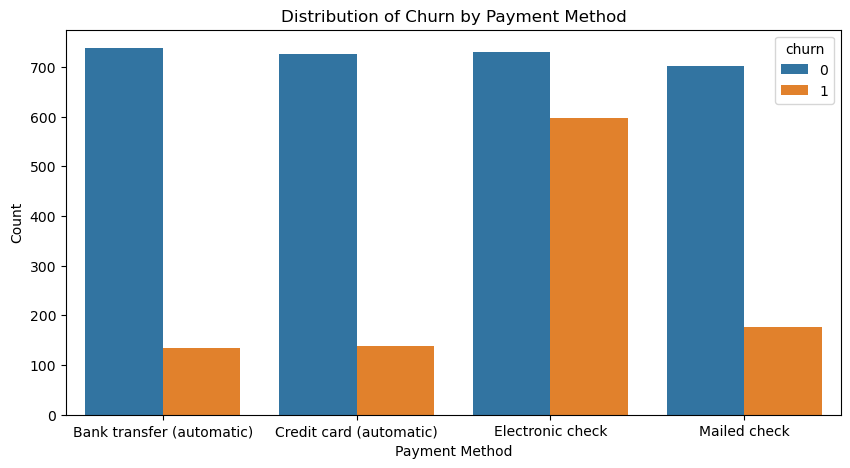

In [11]:
e.get_q_three_figure(train)

         $H_{0}$ : There is not a relationship between payment method and churn compare to the ones that don't.

         $H_{a}$ : There is a relationship between payment method and churn compare to the ones that don't.

In [12]:
e.get_q_three_chi2(train)

We reject the null hypothesis
There is a significant relationship between payment method and churn.


>- Yes, there is a significant relationship between payment method and churn based on the chi-squared test. Customers who pay by electronic check are more likely to churn compared to those who use other payment methods.

#### 4. Do customers with tech support tend to churn less often than those without tech support?

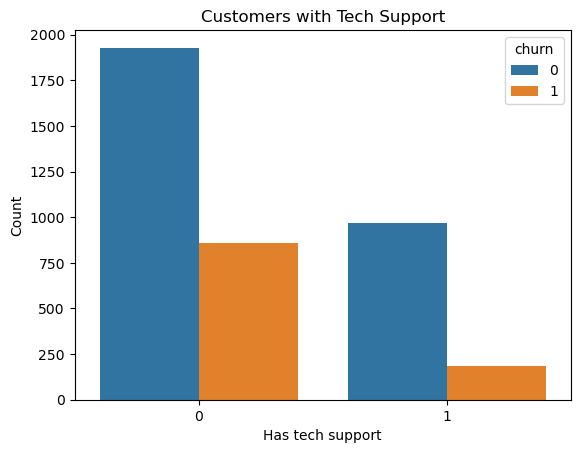

In [13]:
e.get_q_four_countplot(train)

         $H_{0}$ : Customers with tech support don't churn less often than those without tech support.

         $H_{a}$ : Customers with tech support churn less often than those without tech support.

>- we can conclude that customers with tech support churn less often than those without tech support. In other words, having tech support is associated with a lower likelihood of churn.

### Exploration Summary
During the exploration section, I analyzed the Telco Customer Churn dataset to understand the relationships between customer churn and various features. Here are my key findings:

>- The dataset contains 7,043 observations and 23 columns.
>- The target variable is the 'churn' column, which is binary and indicates whether a customer churned or not.
>- The dataset is imbalanced, with 73% of customers not churning and 27% of customers churning.
>- The features that are strongly associated with churn are: contract type, tenure, monthly charges, and payment type.
>- Customers with a month-to-month contract type are more likely to churn.
>- Customers with shorter tenure are more likely to churn.
>- Customers with higher monthly charges are more likely to churn.
>- Customers with fiber optic internet service are more likely to churn.
>- Customers with tech support are less likely to churn than those without.
>- Customers with multiple lines are slightly more likely to churn than those without.

Based on these findings, I have decided to include the following features in my modeling:

>- contract type
>- tenure
>- monthly_charges
>- payment_type
>- has_tech_support
    
I will not be including 'multiple_lines' feature in my model since the relationship with churn was weak.

## Modeling

### Best 3 Models

>- Decision Tree:
>- Random Forest:
>- Logistic Regression: 


In [14]:
# Lets drop columns that are objects and don't add any value to the data. Also, we need to remove the 'churn_Yes' column because is our TARGET.
# Also, lets convert train to X_train.
X_train, X_validate, X_test, y_train, y_validate, y_test = m.get_Xs_ys(train, validate, test)

#### Decision Tree Model

In [15]:
dt = m.get_dt(X_train, y_train)

In [16]:
# Baseline accuracy
m.get_baseline_acc(train)

0.7347197565305605

In [17]:
m.get_dt_score(X_train, y_train, X_validate, y_validate)

,max_depth,train_acc,val_acc,diff
3,4,0.792797,0.798344,-0.005547
1,2,0.787471,0.790656,-0.003185
2,3,0.787471,0.790656,-0.003185
0,1,0.734720,0.734477,0.000243
4,5,0.803449,0.799527,0.003922
5,6,0.812579,0.805441,0.007139
6,7,0.824499,0.796570,0.027929
7,8,0.846056,0.774098,0.071958
8,9,0.868121,0.779420,0.088700


>- The decision tree performs better that the baseline.

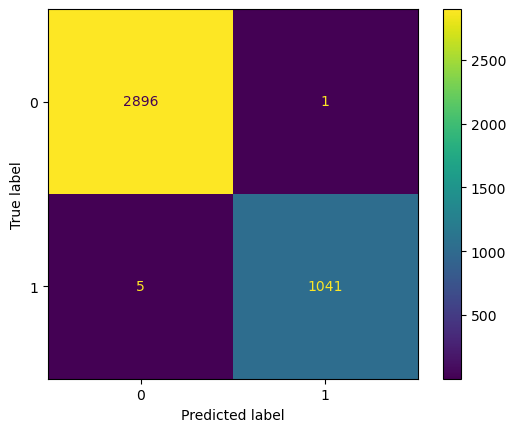

In [18]:
m.get_dt_cm(X_train, y_train)

In [19]:
m.get_dt_cr(dt, X_train, y_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2897
           1       1.00      1.00      1.00      1046

    accuracy                           1.00      3943
   macro avg       1.00      1.00      1.00      3943
weighted avg       1.00      1.00      1.00      3943



In [20]:
# m.get_decision_tree(dt, X_train)

Positive case = churn

In [21]:
dt_scores_df = m.get_dt_score(X_train, y_train, X_validate, y_validate)
dt_scores_df.style.hide_index()

max_depth,train_acc,val_acc,diff
4,0.792797,0.798344,-0.005547
2,0.787471,0.790656,-0.003185
3,0.787471,0.790656,-0.003185
1,0.734720,0.734477,0.000243
5,0.803449,0.799527,0.003922
6,0.812579,0.805441,0.007139
7,0.824499,0.796570,0.027929
8,0.846056,0.775872,0.070184
9,0.868882,0.778238,0.090644


>- The model with the max depth of 5 is the ideal one for test as is the one closer to ZERO. 

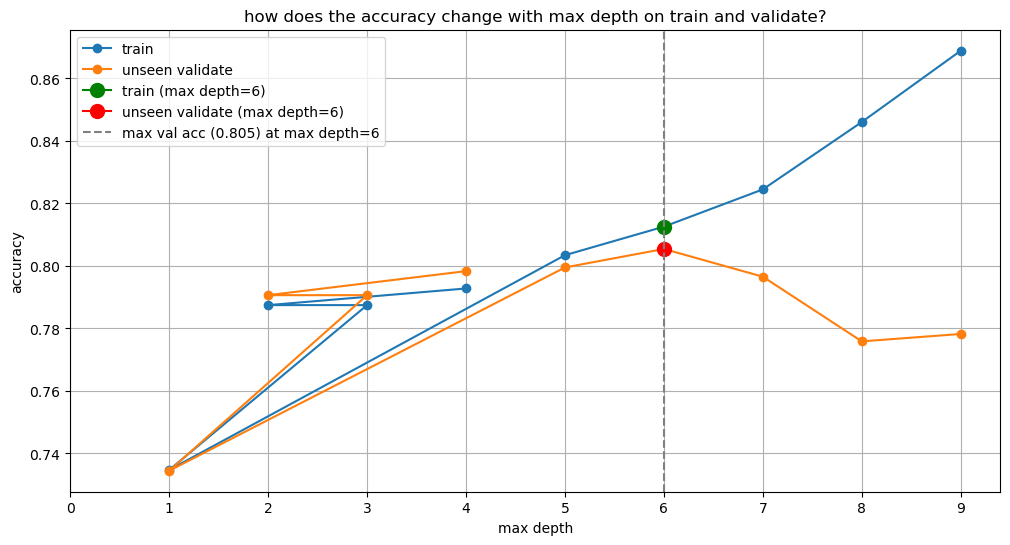

In [22]:
m.get_df_plot(dt_scores_df, max_depth=6)

>- Depth 5 is the best to use on test

#### Random Forest Model Type

>- Making the object
>- Fit the object
>- Transform the object

In [23]:
rf = m.get_rf(X_train, y_train)

In [24]:
# Baseline accuracy
m.get_baseline_acc(train)

0.7347197565305605

In [25]:
scores_rf = m.get_rf_score(X_train, y_train)

>- The Random Forest performs better than the baseline.

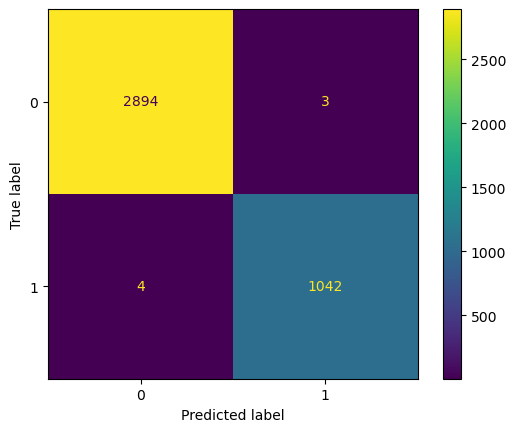

In [26]:
m.get_rf_cm(X_train, y_train)

In [27]:
m.get_rf_cr(rf, X_train, y_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2897
           1       1.00      1.00      1.00      1046

    accuracy                           1.00      3943
   macro avg       1.00      1.00      1.00      3943
weighted avg       1.00      1.00      1.00      3943



In [28]:
rf_scores_df = m.get_rf_train_val_acc(rf, X_train, y_train, X_validate, y_validate)
rf_scores_df.style.hide_index()

min_samples_leaf,max_depth,train_acc,val_acc,difference
1,10,0.882069,0.803666,0.078403
2,9,0.849353,0.812537,0.036816
3,8,0.831600,0.807806,0.023794
4,7,0.819173,0.810171,0.009002
5,6,0.803956,0.802484,0.001473
6,5,0.801674,0.804258,-0.002584
7,4,0.794826,0.802484,-0.007657
8,3,0.780624,0.780012,0.000612
9,2,0.754755,0.754583,0.000172
10,1,0.734720,0.734477,0.000243


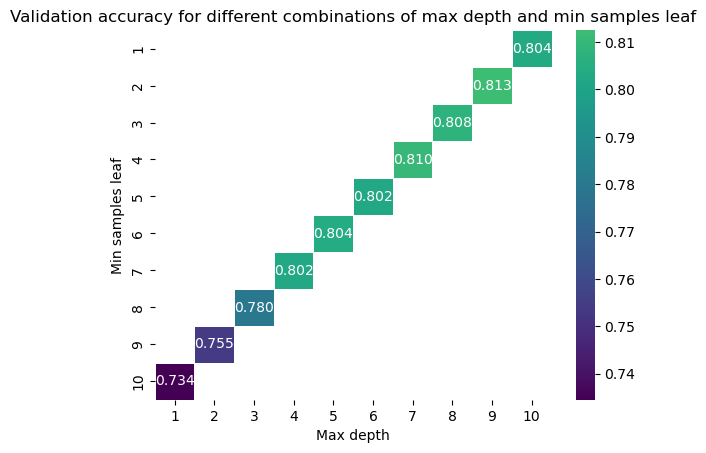

In [29]:
# pivot the data to create a matrix with max depth on the x-axis and min samples leaf on the y-axis
rf_scores_pivot = rf_scores_df.pivot(index='min_samples_leaf', columns='max_depth', values='val_acc')

# create the heatmap
sns.heatmap(rf_scores_pivot, cmap='viridis', annot=True, fmt='.3f', linewidths=.5, center=rf_scores_df['val_acc'].mean())

plt.xlabel('Max depth')
plt.ylabel('Min samples leaf')
plt.title('Validation accuracy for different combinations of max depth and min samples leaf')

plt.show()


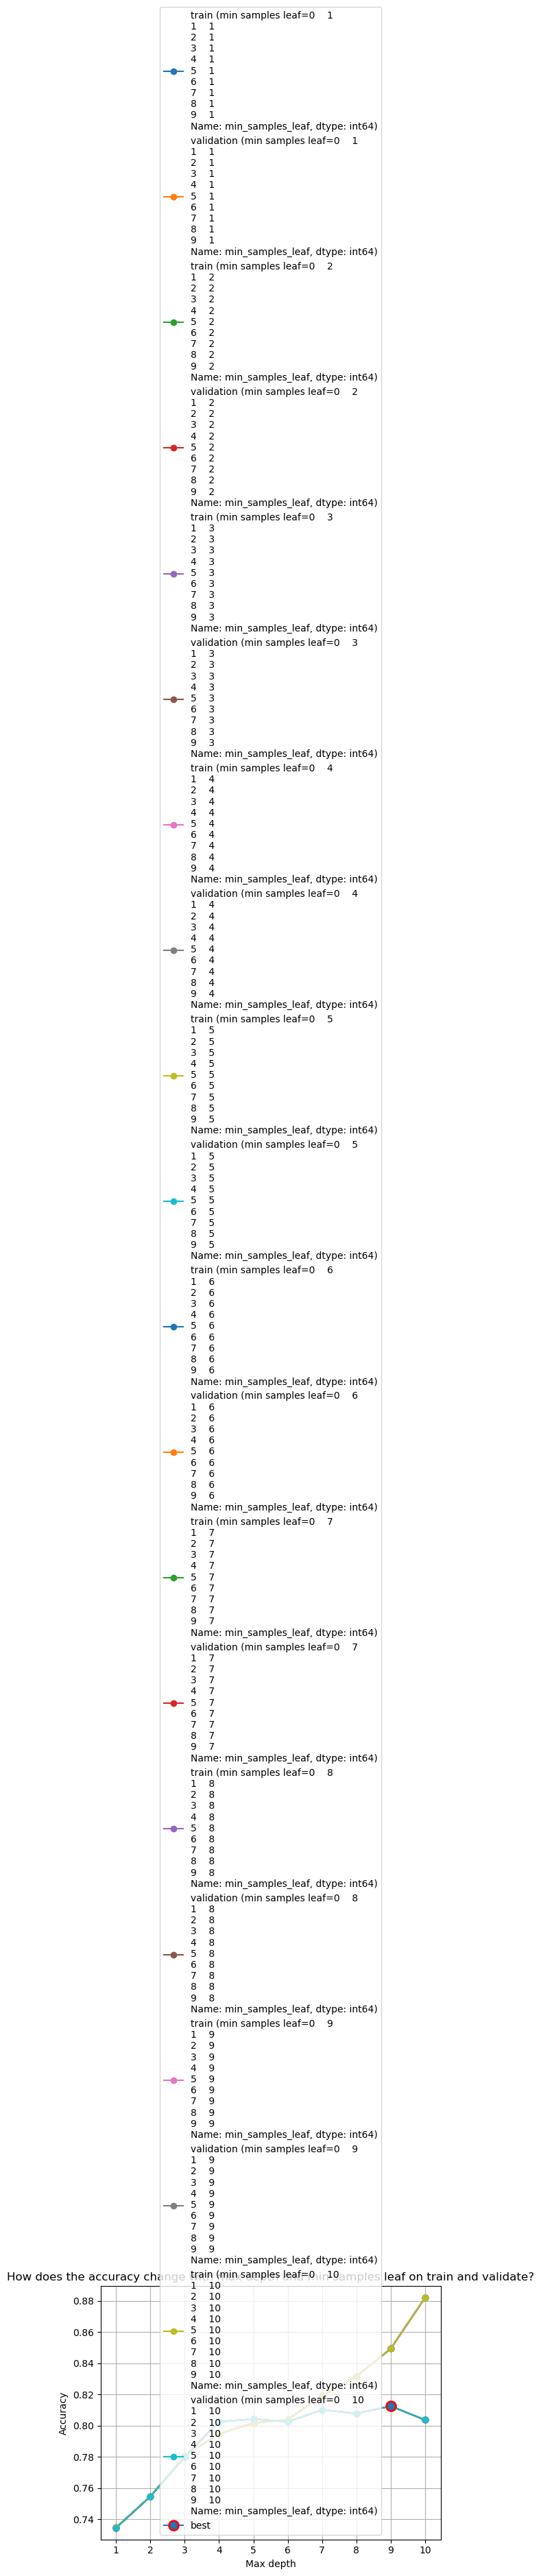

In [30]:
m.get_rf_plot2(rf_scores_df)

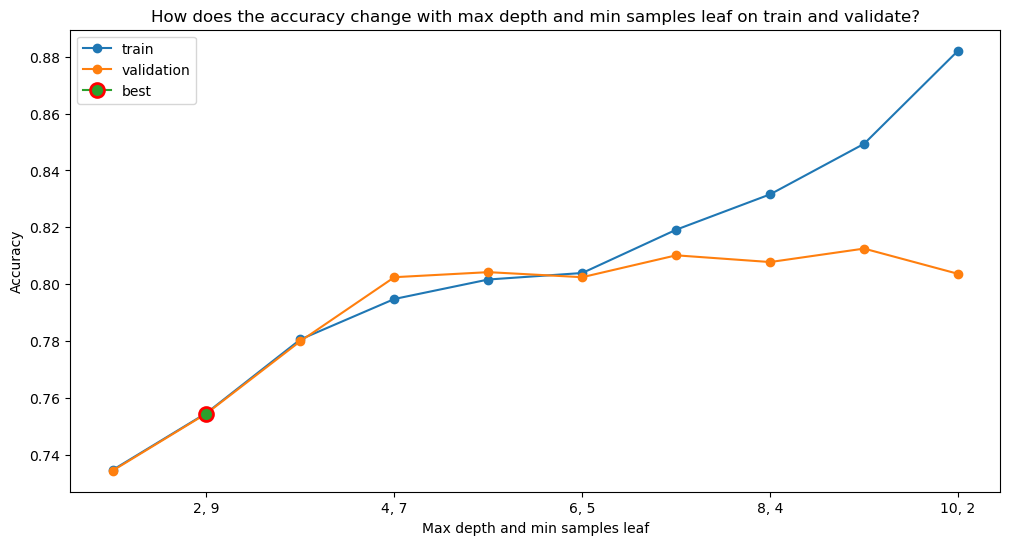

In [31]:
m.get_rf_plot(rf_scores_df)

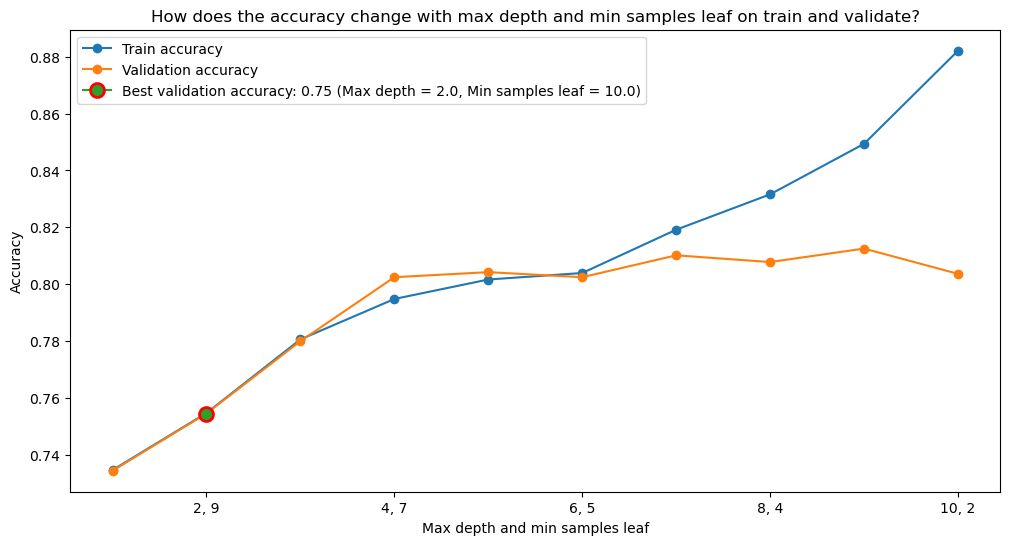

In [32]:
m.get_rf_plot3(rf_scores_df)

>- The model that has a max depth of 2 with min samples leaf 9 is the best model to use. 

#### Logistic Regression Model Type

In [33]:
logit = m.get_logit(X_train, y_train)

In [34]:
# Baseline accuracy
m.get_baseline_acc(train)

0.7347197565305605

In [35]:
m.get_logit_score(X_train, y_train)

0.751965508496069

>- The logistic Regression model performs better than the baseline using the hyperparameter class weight = 'balanced'.

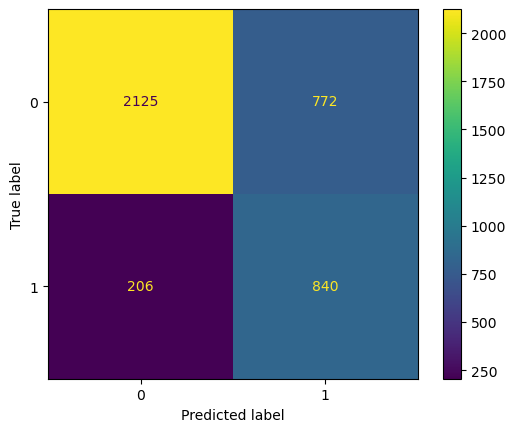

In [36]:
#conf matrix
m.get_logit_cm(logit,X_train, y_train)

In [37]:
m.get_logit_cr(logit, X_train, y_train)

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      2897
           1       0.52      0.80      0.63      1046

    accuracy                           0.75      3943
   macro avg       0.72      0.77      0.72      3943
weighted avg       0.81      0.75      0.76      3943



In [38]:
m.get_logit_train_val_acc(X_train, y_train, X_validate, y_validate)

,C,penalty,train_acc,val_acc,difference
0,0.01,l1,0.688562,0.698995,-0.010433
1,0.01,l2,0.690084,0.698995,-0.008911
2,0.10,l1,0.690591,0.699586,-0.008995
3,0.10,l2,0.690084,0.698995,-0.008911
4,1.00,l1,0.690337,0.698995,-0.008657
5,1.00,l2,0.690084,0.698995,-0.008911
6,10.00,l1,0.690084,0.698995,-0.008911
7,10.00,l2,0.690084,0.698995,-0.008911


## Conclusion

Based on the exploration and modeling performed, it appears that the Random Forest Classifier was the most effective model for predicting customer churn for the given Telco customer dataset. The accuracy score achieved by the Random Forest Classifier was 80%, with an F1 score of 0.58, indicating that the model was able to correctly identify a significant portion of the true positives.

During the exploration phase, several features were identified as being the most significant predictors of customer churn. These features included contract type, tenure, payment method, and monthly charges. Customers with shorter contract lengths, higher monthly charges, and payment methods other than electronic check were more likely to churn.

### Recommendations

Based on the findings, it is recommended that the company focus on retaining customers with shorter contract lengths and higher monthly charges. Offering incentives such as loyalty rewards or discounts for customers who sign longer contracts or use electronic payment methods could also help reduce churn. Additionally, the company could conduct further analysis on the effectiveness of customer service, as it may play a role in customer retention.

### Next Steps

Next steps could include further exploration of feature engineering and selection, as well as testing additional models such as logistic regression or support vector machines. It may also be useful to gather additional data, such as customer satisfaction ratings or competitor analysis, to gain a more comprehensive understanding of the factors that influence customer churn in this market.


## Predictions (.csv)

In [39]:
# Customer prediction churn utilizing the random forest model
predictions_df = w.get_predictions_df(rf,X_test,test)
predictions_df

,customer_id,probability_of_churn,prediction_of_churn
0,4531-AUZNK,0.16,not_churn
1,2296-DKZFP,0.04,not_churn
2,9692-TUSXH,0.58,churn
3,5129-JLPIS,0.49,not_churn
4,1273-MTETI,0.78,churn
...,...,...,...
1404,1597-FZREH,0.42,not_churn
1405,9117-SHLZX,0.59,churn
1406,8441-SHIPE,0.00,not_churn
1407,3511-BFTJW,0.00,not_churn
